In [1]:
import numpy as np
import pandas as pd
import missingno as mso
from joblib import dump # for model persistance
import sklearn.metrics as m
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.neighbors import LocalOutlierFactor
# feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, mutual_info_regression

In [2]:
pd.set_option('display.max_columns', None)

url = 'https://raw.githubusercontent.com/digipodium/Datasets/main/regression/automobile.csv'
df = pd.read_csv(url)
df.head()

df.replace('?', np.nan, inplace=True) 

# mso.matrix(df, figsize=(15,5))
# plt.show()

num_cols = ['normalized-losses','wheel-base','length','width',
            'height','curb-weight','engine-size','compression-ratio',
            'bore','stroke','horsepower','peak-rpm','city-mpg','highway-mpg']
cat_cols = ['symboling', 'make','fuel-type','aspiration','num-of-doors','drive-wheels',
            'body-style','engine-location','engine-type','num-of-cylinders','fuel-system']

df.dropna(subset=['price'], inplace=True)
df['price'] = df['price'].astype(int)

X, y = df.drop('price', axis=1) , df['price']

In [3]:
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer()),
    ('scaler', StandardScaler())
])
cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('hot_encode', OneHotEncoder(drop='first', handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(transformers=[
    ('numerical', num_transformer, num_cols),
    ('categorical', cat_transformer, cat_cols),
])

model = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('selector', SelectKBest(f_regression, k=25)),
    ('regressor', LinearRegression())
])

model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['normalized-losses',
                                                   'wheel-base', 'length',
                                                   'width', 'height',
                                                   'curb-weight', 'engine-size',
                                                   'compression-ratio', 'bore',
                                                   'stroke', 'horsepower',
                                                   'peak-rpm', 'city-mpg',
                                                   'highway-mpg']),
                                                 ('categorical',
                                                  Pipeline(...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('hot_encode',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['symboling', 'make',
                                                   'fuel-type', 'aspiration',
                                                   'num-of-doors',
                                                   'drive-wheels', 'body-style',
                                                   'engine-location',
                                                   'engine-type',
                                                   'num-of-cylinders',
                                                   'fuel-system'])])),
                ('selector',
                 SelectKBest(k=25,
                             score_func=<function f_regression at 0x000002D50A29C160>)),
                ('regressor', LinearRegression())])

In [4]:
# remove outliers
lof = LocalOutlierFactor(n_neighbors=5, contamination=.1)
X_p = preprocessor.fit_transform(X)
yhat = lof.fit_predict(X_p)
X = X[yhat==1]
y = y[yhat==1]

Xtrain: (144, 26), Xtest: (37, 26)
Score :0.937
MAE: 1371.178
MSE: 3658807.825


c:\Users\ZAID\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


['automobile_price_prediction.jb']

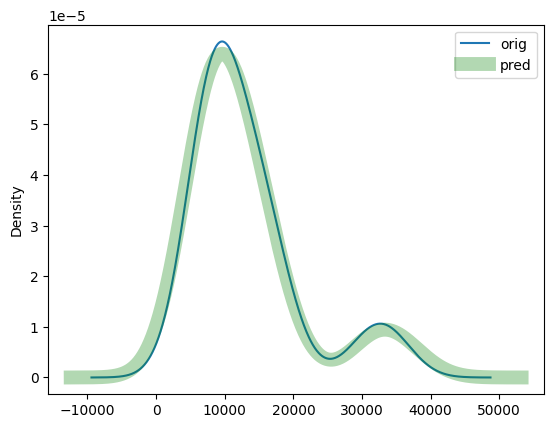

In [5]:
Xtrain, Xtest, ytrain, ytest  = train_test_split(X, y, test_size=.2, random_state=42)
print(f'Xtrain: {Xtrain.shape}, Xtest: {Xtest.shape}')
model.fit(Xtrain, ytrain)

ypred = model.predict(Xtest)
score = m.r2_score(ytest, ypred)
mae = m.mean_absolute_error(ytest, ypred)
mse = m.mean_squared_error(ytest, ypred)
print(f'Score :{score:.3f}')
print(f'MAE: {mae:.3f}')
print(f'MSE: {mse:.3f}')


evaldf = pd.DataFrame([ytest.values, ypred], index=['orig','pred']).T
ax = evaldf.plot(kind='kde', y='orig')
evaldf.plot(kind='kde', y='pred', linewidth=10, alpha=.3, style='g', ax=ax)
# plt.show()

dump(model,'automobile_price_prediction.jb')

In [6]:
model.predict(df)

c:\Users\ZAID\miniconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [1, 9, 10] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


array([10041.52349453, 10041.52349453, 16509.12292684, 11346.36323896,
       17236.3278893 , 14812.63099682, 20645.84056651, 20886.98933956,
       22903.78111472, 21012.71233052, 21012.71233052, 23558.39557463,
       23678.96996116, 25922.43136017, 31156.4020449 , 32252.84505263,
       35914.29892616,  2453.43041354,  6341.17405818,  6987.74719523,
        6256.32759269,  5990.85669489,  8018.85077465,  6190.35249805,
        6996.79015883,  6996.79015883,  8915.17115993, 10155.01454763,
       14174.82961021,  5570.92058871,  5691.41978562,  5222.11490394,
        6411.5704337 ,  6446.64661887,  7040.45505767,  7204.10756167,
        8333.3960504 ,  8449.58591378,  8911.89730811,  6449.07452613,
       10226.15831368, 11544.47044563,  5942.426469  ,  9550.4162027 ,
       33900.        , 33900.        , 47224.26911871,  5486.18854238,
        6126.58156189,  6137.54286976,  6662.98435874,  6511.47446218,
        9806.12126886,  9806.12126886,  9817.08257673, 13242.15307557,
      

In [7]:
X.shape

(181, 26)

In [11]:
print(X.iloc[0])
print(X.shape[1])

Unnamed: 0               3
symboling                2
normalized-losses      164
make                  audi
fuel-type              gas
aspiration             std
num-of-doors          four
body-style           sedan
drive-wheels           fwd
engine-location      front
wheel-base            99.8
length               176.6
width                 66.2
height                54.3
curb-weight           2337
engine-type            ohc
num-of-cylinders      four
engine-size            109
fuel-system           mpfi
bore                  3.19
stroke                3.40
compression-ratio     10.0
horsepower             102
peak-rpm              5500
city-mpg                24
highway-mpg             30
Name: 3, dtype: object
26


In [12]:
print(X.iloc[0].values)

[3 2 '164' 'audi' 'gas' 'std' 'four' 'sedan' 'fwd' 'front' 99.8 176.6 66.2
 54.3 2337 'ohc' 'four' 109 'mpfi' '3.19' '3.40' 10.0 '102' '5500' 24 30]


In [13]:
df['symboling'].unique()

array([ 3,  1,  2,  0, -1, -2], dtype=int64)